# Lab 3: CNN for Handwritted Digit Recognition


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from keras.optimizers import SGD, RMSprop, Adam

import matplotlib.pyplot as plt
np.random.seed(42)
#tf.random.set_seed(42)

Downloading the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

6


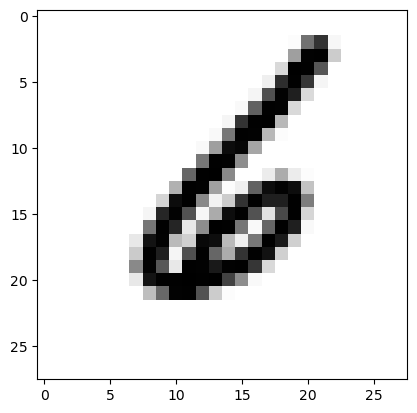

In [5]:
image_index = 999
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

Preprocessing the data

In [6]:
#Reshaping the array to 4-dims
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Converting the type to 'float'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input value (input value range: {0,255})
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Defining the CNN model

In [7]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),padding='same',strides=1, input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model description

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                                                                 
 dense (Dense)               (None, 128)               702592    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

Running the CNN model

In [9]:
optimizer = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    )
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2011 - accuracy: 0.9384 - val_loss: 0.0930 - val_accuracy: 0.9712
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0730 - accuracy: 0.9778 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0497 - accuracy: 0.9851 - val_loss: 0.0613 - val_accuracy: 0.9812
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0500 - val_accuracy: 0.9845
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0468 - val_accuracy: 0.9864


Reference:

[1] [Keras loss functions](https://keras.io/api/losses/)

[2] [Keras optimizers](https://keras.io/api/optimizers/)

[3] [Keras metrics](https://keras.io/api/metrics/)

Evaluate the model

In [10]:
model.metrics_names

['loss', 'accuracy']

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0450 - accuracy: 0.9874


[0.04496559873223305, 0.9873999953269958]

conv2d
[[[-0.0403163 ]
  [ 0.14148591]
  [-0.08212924]]

 [[ 0.01955585]
  [ 0.03852077]
  [-0.01102333]]

 [[-0.14091963]
  [ 0.10779737]
  [ 0.02918622]]]
max_pooling2d
flatten
dense
dropout
dense_1


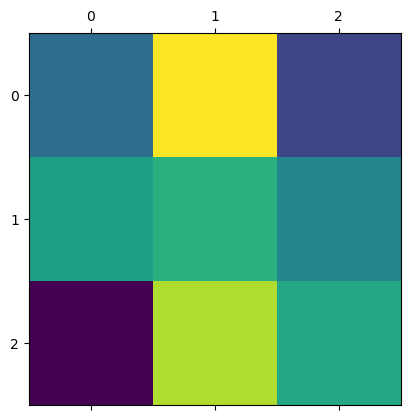

In [12]:
for layer in model.layers:
    print(layer.name)
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    plt.matshow(filters[:,:,:,0].reshape(3,3))
    print(filters[:,:,:,0])

In [13]:
def plotloss(history,both = True):
    plt.plot(history.history['loss'])
    if both:
        plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

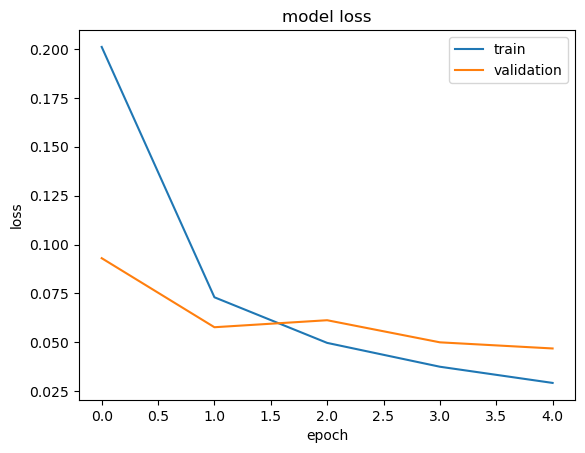

In [14]:
plotloss(history,True)

1/1 [==============================] - 0s 102ms/step
(1, 10)
0 3.3087672e-14
1 7.559761e-13
2 6.348397e-10
3 1.2255519e-09
4 2.7140635e-16
5 1.8145633e-14
6 9.964789e-21
7 1.0
8 4.965305e-14
9 1.4025095e-10
--------------
7
7


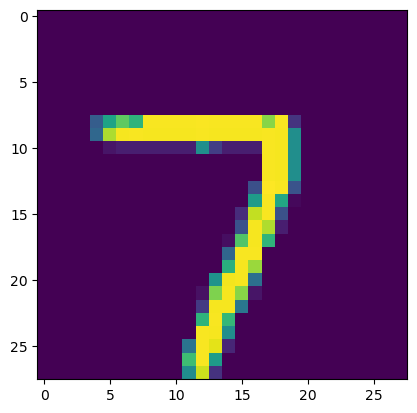

In [15]:
image_index = 3400
plt.imshow(x_test[image_index].reshape(28, 28))#,cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])

## Lab
### Task #1
- Implement LeNet on this task (the final layer should be softmax)
- Plot the loss after each epoch
- Display the kernel/filters of the $1^{st}$ conv layer
- Show the performance 
<img src='lenet.png'>

#### Resources
- https://keras.io/
- https://www.tensorflow.org/

Start your code here:
    

In [16]:
lenet = Sequential([
    Conv2D(6, kernel_size=(5,5), padding='same',strides=(2, 2), input_shape=input_shape,activation='sigmoid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), padding='valid', input_shape=(14, 14, 6), activation='sigmoid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2),),
    Flatten(),
    Dense(120, activation='sigmoid'),
    Dense(84, activation='sigmoid'),
    Dense(10, activation='softmax')
])

lenet.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = lenet.fit(x=x_train,y=y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4641 - accuracy: 0.4661 - val_loss: 0.8497 - val_accuracy: 0.6987
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7034 - accuracy: 0.7581 - val_loss: 0.6053 - val_accuracy: 0.7845
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5411 - accuracy: 0.8098 - val_loss: 0.4641 - val_accuracy: 0.8378
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4447 - accuracy: 0.8505 - val_loss: 0.3759 - val_accuracy: 0.8780
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3661 - accuracy: 0.8813 - val_loss: 0.3052 - val_accuracy: 0.9027
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2971 - accuracy: 0.9064 - val_loss: 0.2453 - val_accuracy: 0.9237
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2478 - accuracy: 0.9213 - val_loss: 0.2177 - val_accuracy:

In [17]:
lenet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1652 - accuracy: 0.9490


[0.1652037650346756, 0.9490000009536743]

### Task #2
- Classify images into several categories
- Complete a model to classify each image into the 10 classes described below
- Compile and train the model
- Print the summary of the model
- Evaluate the model 
    - Show the model loss and accuracy
    - Plot the train and validation loss
    - For 4 samples from the test set
        - Display the image
        - Print the true label in text
        - Print the output probabilities of all the classes
        - Print the predicted label in text

#### Load the dataset and normalize the pixel values

In [18]:
cifar = keras.datasets.cifar10 
(X_train, y_train), (X_test, y_test) = cifar.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255.0, X_test/255.0

#### Define the output classes

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### Display sample images

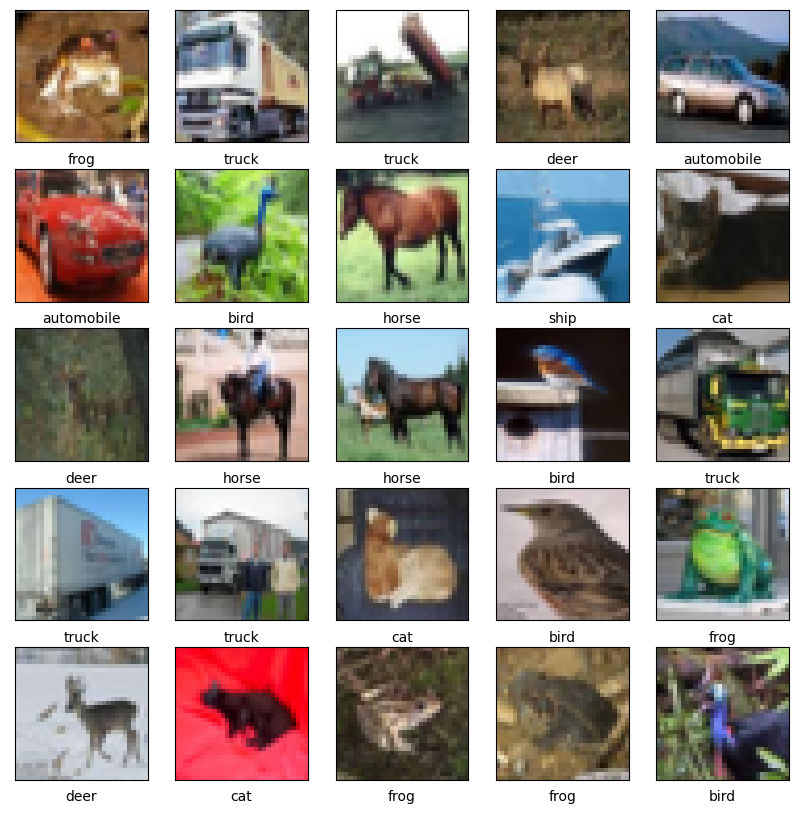

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

#### Build the model

In [39]:
cnn = Sequential([
    Conv2D(32, (3, 3), activation='swish', padding='same', input_shape=(32, 32, 3)),
	Conv2D(32, (3, 3), activation='swish', padding='same'),
	MaxPooling2D((2, 2)),
	Conv2D(64, (3, 3), activation='swish', padding='same'),
	Conv2D(64, (3, 3), activation='swish', padding='same'),
	MaxPooling2D((2, 2)),
	Conv2D(128, (3, 3), activation='swish', padding='same'),
	Conv2D(128, (3, 3), activation='swish', padding='same'),
	MaxPooling2D((2, 2)),
	Conv2D(256, (3, 3), activation='swish', padding='same'),
	Conv2D(256, (3, 3), activation='swish', padding='same'),
	MaxPooling2D((2, 2)),
	Flatten(),
	Dense(256, activation='swish'),
	Dense(10, activation='softmax'),
])

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#### Train the model and achieve accuracy greater than 75%

- Use validation set

In [40]:
history = cnn.fit(x=X_train,y=y_train, epochs=15,validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 12s 9ms/step - loss: 3.6115 - accuracy: 0.2041 - val_loss: 2.0019 - val_accuracy: 0.2392
Epoch 2/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.9146 - accuracy: 0.2922 - val_loss: 1.9019 - val_accuracy: 0.3149
Epoch 3/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7855 - accuracy: 0.3419 - val_loss: 1.7679 - val_accuracy: 0.3554
Epoch 4/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7105 - accuracy: 0.3698 - val_loss: 1.6396 - val_accuracy: 0.4008
Epoch 5/15
1250/1250 [==============================] - 12s 10ms/step - loss: 1.5597 - accuracy: 0.4304 - val_loss: 1.4724 - val_accuracy: 0.4658
Epoch 6/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3765 - accuracy: 0.5012 - val_loss: 1.2897 - val_accuracy: 0.5349
Epoch 7/15
1250/1250 [==============================] - 11s 8ms/step - loss: 1.1900 - accuracy: 0.5707 - val_loss: 1.1136 - val_a

#### Print the model summary

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                                                                 
 dense (Dense)               (None, 128)               702592    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

#### Evaluate the model

- plot training and validation loss
- print accuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.8455 - accuracy: 0.7526


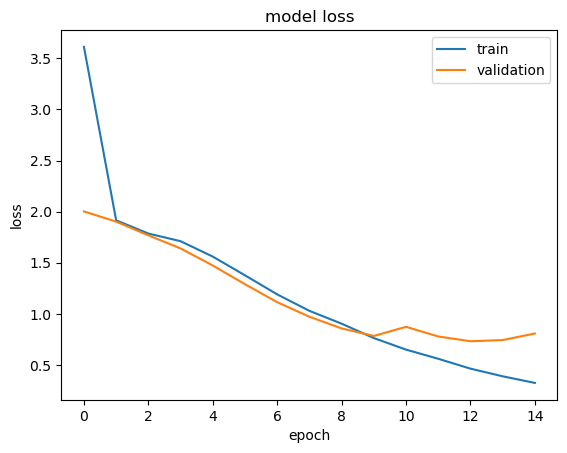

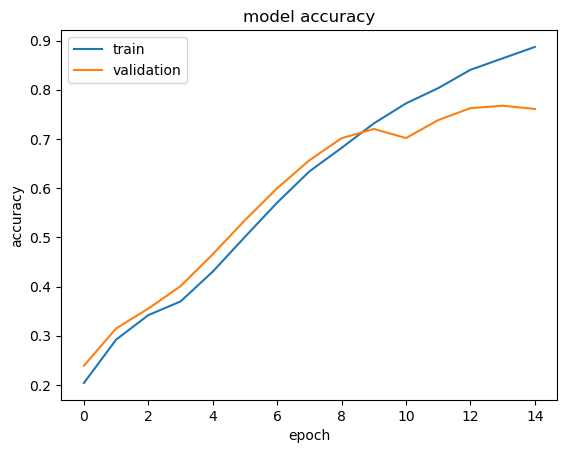

In [42]:
def plotAccuracy(history,both = True):
    plt.plot(history.history['accuracy'])
    if both:
        plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

cnn.evaluate(x=X_test, y=y_test)

plotloss(history, True)
plotAccuracy(history, True)

### Taking 4 samples from the test set 
- display the image
- print the true label
- print the output probability distribution of the classes
- print the predicted class

### Sample #1 

1/1 [==============================] - 0s 429ms/step
(1, 10)
0 0.0011999266
1 0.008146288
2 0.00044575948
3 0.00036269808
4 0.00040617373
5 5.5634944e-05
6 0.0002589125
7 3.1804109e-06
8 0.98846895
9 0.0006524321
--------------
8
[8]


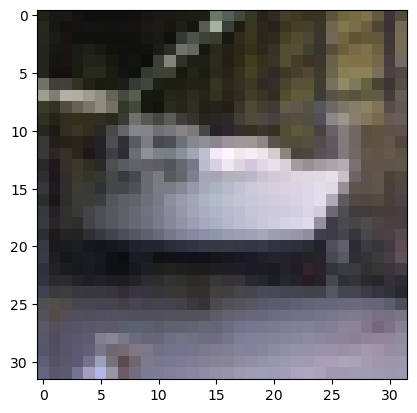

In [43]:
import random
image_index = random.choice([i for i in range(X_test.shape[0])])
plt.imshow(X_test[image_index].reshape(32, 32, 3))#,cmap='Greys')
pred = cnn.predict(X_test[image_index].reshape(1, 32, 32, 3))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])

### Sample #2

1/1 [==============================] - 0s 19ms/step
(1, 10)
0 0.0035634097
1 6.879908e-05
2 0.7809546
3 0.0068639605
4 0.002299404
5 0.12942524
6 0.067034416
7 0.009072079
8 0.00016446724
9 0.0005537153
--------------
2
[3]


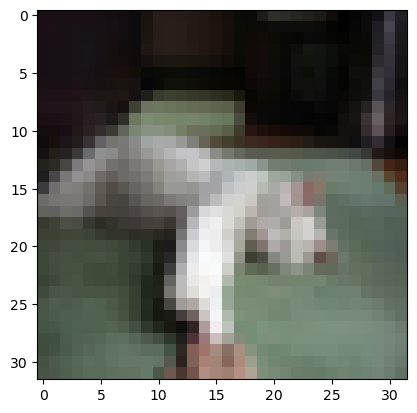

In [44]:
image_index = random.choice([i for i in range(X_test.shape[0])])
plt.imshow(X_test[image_index].reshape(32, 32, 3))#,cmap='Greys')
pred = cnn.predict(X_test[image_index].reshape(1, 32, 32, 3))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])

### Sample #3

1/1 [==============================] - 0s 18ms/step
(1, 10)
0 0.000100701356
1 5.019359e-05
2 0.105387114
3 0.09175144
4 0.005963127
5 0.027151078
6 0.76345974
7 0.0043850397
8 0.0004924509
9 0.001259171
--------------
6
[6]


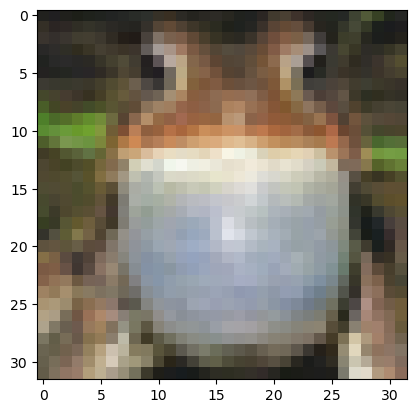

In [45]:
image_index = random.choice([i for i in range(X_test.shape[0])])
plt.imshow(X_test[image_index].reshape(32, 32, 3))#,cmap='Greys')
pred = cnn.predict(X_test[image_index].reshape(1, 32, 32, 3))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])

### Sample #4

1/1 [==============================] - 0s 19ms/step
(1, 10)
0 0.0054747104
1 0.0007973367
2 0.0051545408
3 0.47214448
4 0.31641135
5 0.036648963
6 0.1430952
7 0.00046127426
8 0.00280719
9 0.01700504
--------------
3
[3]


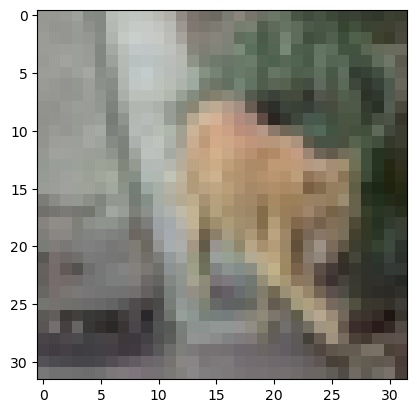

In [46]:
image_index = random.choice([i for i in range(X_test.shape[0])])
plt.imshow(X_test[image_index].reshape(32, 32, 3))#,cmap='Greys')
pred = cnn.predict(X_test[image_index].reshape(1, 32, 32, 3))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])